**Brian Blaylock**  
*December 14, 2020*

# 👨🏻‍🏫 Plot HRRR data on a cartopy map wtih `common_features`
I wrote my `common_features` function to help with creating a cartopy axes and adding common cartopy features to a map. It really comes in handy. There are more examples of it's usage [here](https://github.com/blaylockbk/Carpenter_Workshop/blob/main/notebooks/demo_cartopy_tools.ipynb).

<div class="alert alert-block alert-warning">
    <h3>Quick note on pcolormesh's `shading` argument</h3>
Matplotlib's pcolormesh has a shading argument, and the default behavior is changing. <b>Read about it <a href='https://matplotlib.org/3.3.3/gallery/images_contours_and_fields/pcolormesh_grids.html'>here</a></b>. For the geophysical data like the HRRR data we are working with here, it is correct to use the <code>shading='nearest'</code> as the argument. This centers the colored data box on the lat/lon point it represents (rather than putting a the lat/lon point on the lower left corner of the colored box).

You can do this two ways: Set the rc.parameter at the top of your script

```python
plt.rcParams['pcolor.shading'] = 'nearest'
```

or specify in the call to pcolormesh

```python
plt.pcolormesh(X, Y, C, shading='nearest')
```
<br>
There is option for <code>'auto'</code> that will handle both, so probably should use 'auto'
    
</div>


In [1]:
from herbie.archive import Herbie

from toolbox.cartopy_tools import common_features, pc

import matplotlib.pyplot as plt

# Set the pcolormesh shading default to auto, so that pcolormesh boxes are centered on the lat/lon point
plt.rcParams['pcolor.shading'] = 'auto'

Download some HRRR data. Let's look at composite reflectivity

In [2]:
H = Herbie('2020-12-14').xarray('REFC:entire')

/p/home/blaylock/BB_python/Herbie/herbie/archive.py:286: UserWarning: `product` not specified. Will use ["sfc"].
  warnings.warn(f'`product` not specified. Will use ["{self.product}"].')


🏋🏻‍♂️ Found 2020-Dec-14 00:00 UTC F00 [HRRR] [product=sfc] GRIB2 file from aws and index file from aws.                                                                                                                                                       
📇 Download subset: [HRRR] model [sfc] product run at 2020-Dec-14 00:00 UTC F00                                                            
 cURL from https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr.20201214/conus/hrrr.t00z.wrfsfcf00.grib2
   1: GRIB_message=1   :REFC:entire atmosphere:anl


---
What does the data look like when we plot it?

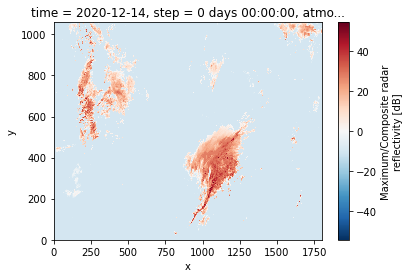

In [3]:
H.refc.plot()

Ok, but we really want to see this data on a map. Let's create a common map with `common_features` method from hrrrb.plots

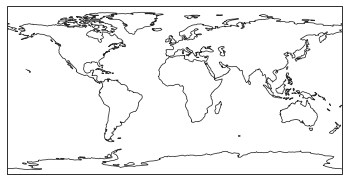

In [4]:
ax = common_features().ax

Notice that it gives us a Platte Carree map of the world. We can use this to plot our HRRR data onto

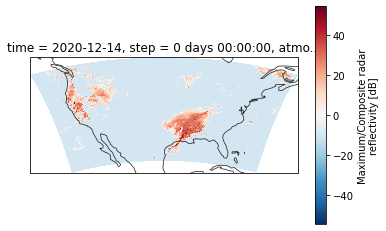

In [5]:
ax = common_features().ax
H.refc.plot(x='longitude', y='latitude', ax=ax, transform=pc)

We can add other features, like states

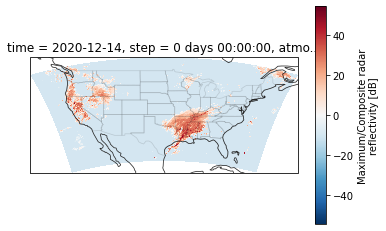

In [6]:
ax = common_features().STATES().ax
H.refc.plot(x='longitude', y='latitude', ax=ax, transform=pc)

Herbie has a custom xarray accessor to get the projection of the model to help us create a map with the right projection.

/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/metpy/xarray.py:349: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'


/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


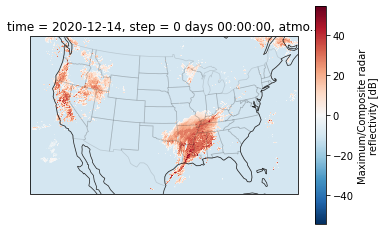

In [7]:
crs = H.herbie.crs

ax = common_features(crs=crs).STATES().ax
H.refc.plot(x='longitude', y='latitude', ax=ax, transform=pc)

Now, mask out the reflectivity values less than 0 and show some ocean and land cover

/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/metpy/xarray.py:349: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'


/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/p/home/blaylock/anaconda

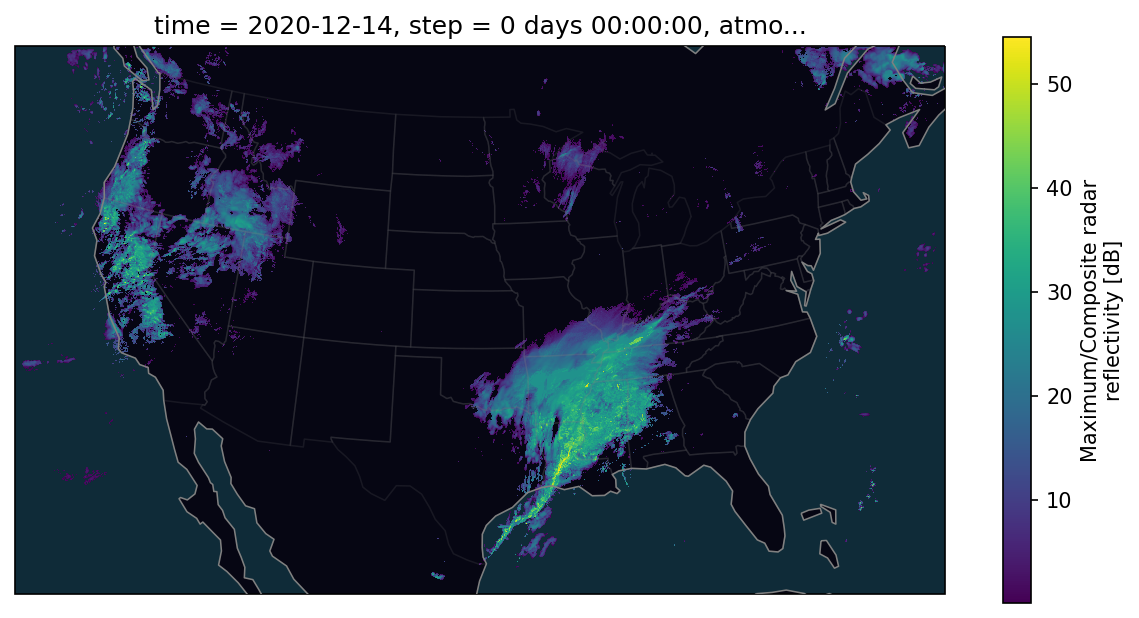

In [8]:
crs = H.herbie.crs

ax = common_features(crs=crs, figsize=[10,5], dpi=150, dark=True).STATES().LAND().OCEAN().ax
H.refc.where(H.refc>0).plot(x='longitude', y='latitude', ax=ax, transform=pc)

Zoom up on a region and show a Stamen map background

/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/metpy/xarray.py:349: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDep

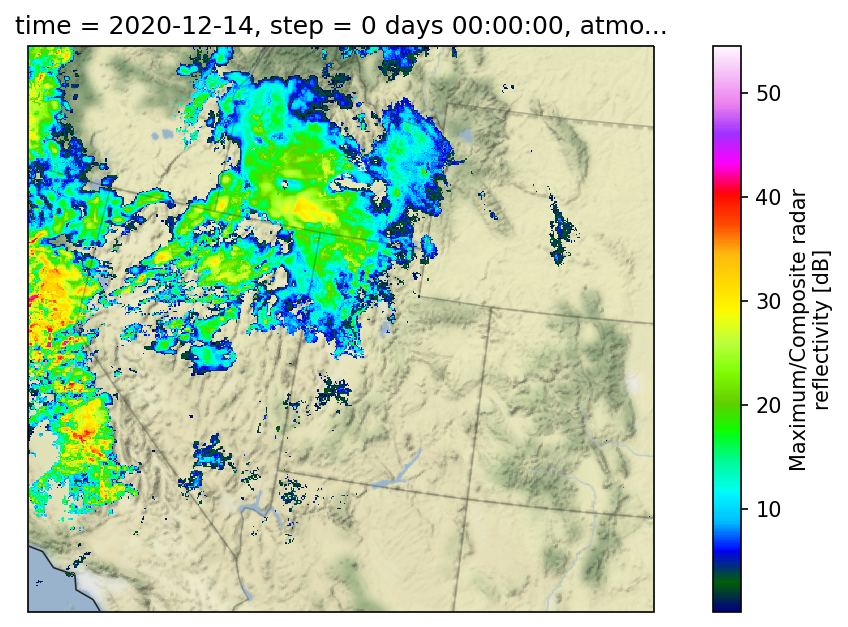

In [9]:
crs = H.herbie.crs

ax = common_features(crs=crs, figsize=[10,5], dpi=150).STATES().STAMEN(zoom=5).ax
H.refc.where(H.refc>0).plot(x='longitude', y='latitude', ax=ax, transform=pc, cmap='gist_ncar')
ax.set_extent([-120, -105, 35, 45], crs=pc)

Change domain, increase feature resolution, and draw counties

/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/metpy/xarray.py:349: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDep

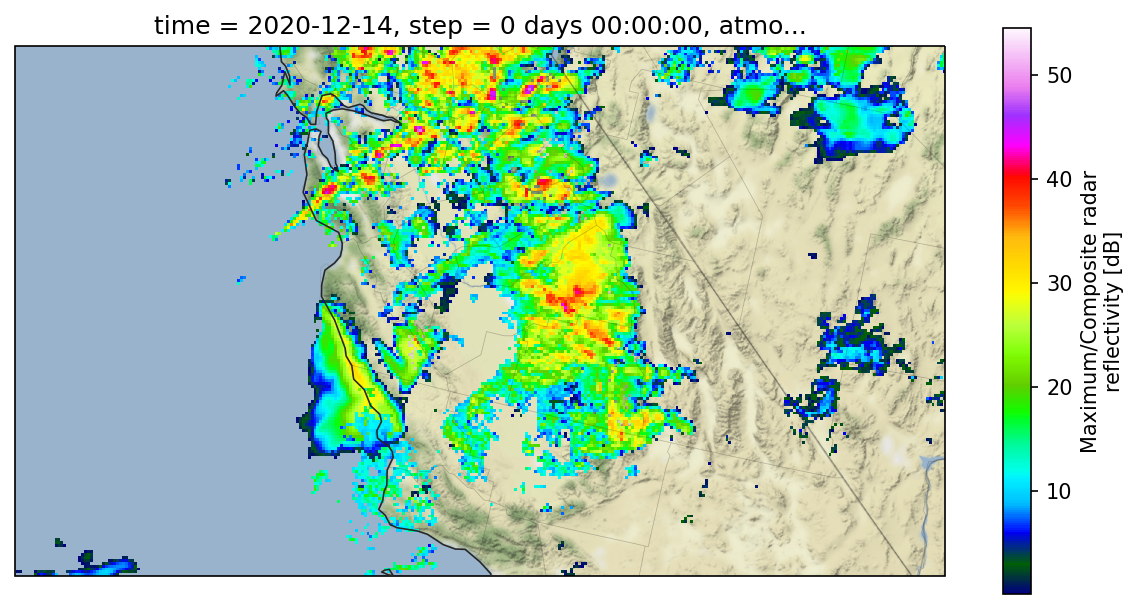

In [10]:
crs = H.herbie.crs

ax = common_features('50m', crs=crs, figsize=[10,5], dpi=150).STATES().COUNTIES().STAMEN(zoom=7).ax
H.refc.where(H.refc>0).plot(x='longitude', y='latitude', ax=ax, transform=pc, cmap='gist_ncar')
ax.set_extent([-125, -115, 35, 38], crs=pc)

The `common_features.DOMAIN(ds)` method creates a visual around the model area.

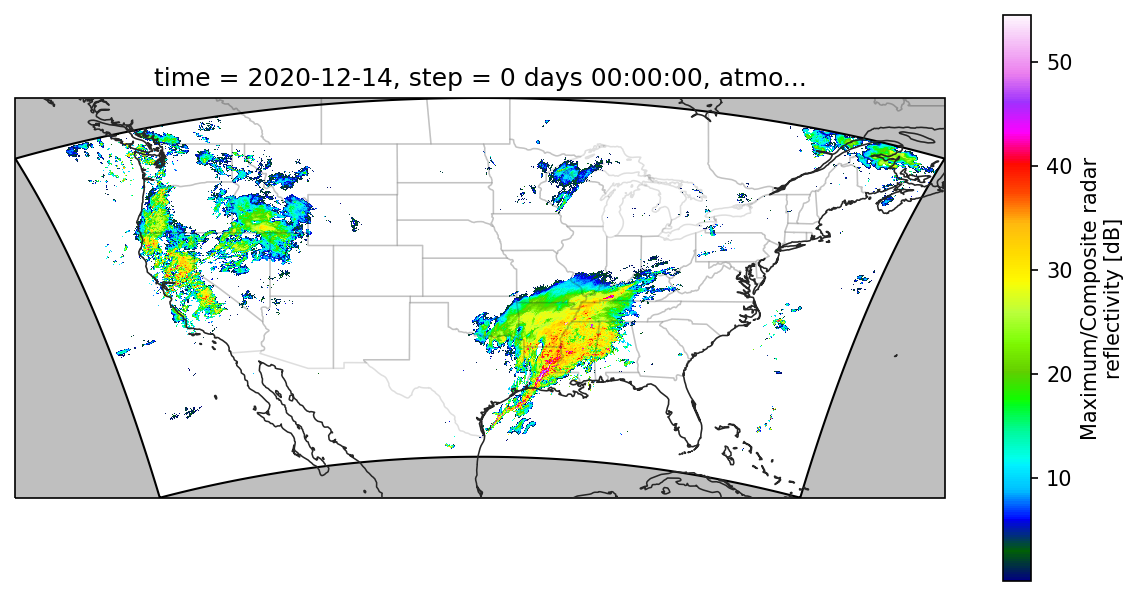

In [11]:
ax = common_features('50m', figsize=[10,5], dpi=150).STATES().DOMAIN(H).ax

H.refc.where(H.refc>0).plot(x='longitude', y='latitude', ax=ax, transform=pc, cmap='gist_ncar')

----
## A side notes on the pcolormesh shading style

Let's look and see how the pcolormesh `shading='auto'` is behaving for a section of the map. We expect the boxes will be centered on the lat/lon points, and we indeed see that is true below...(alpha is set to less than 1 just to show edge boundaries)

Gouraud shading is another possibility shading method, and could be visually appealing, but does not show the explicit value at each point

Text(0.5, 1.0, 'shading="gouraud"')

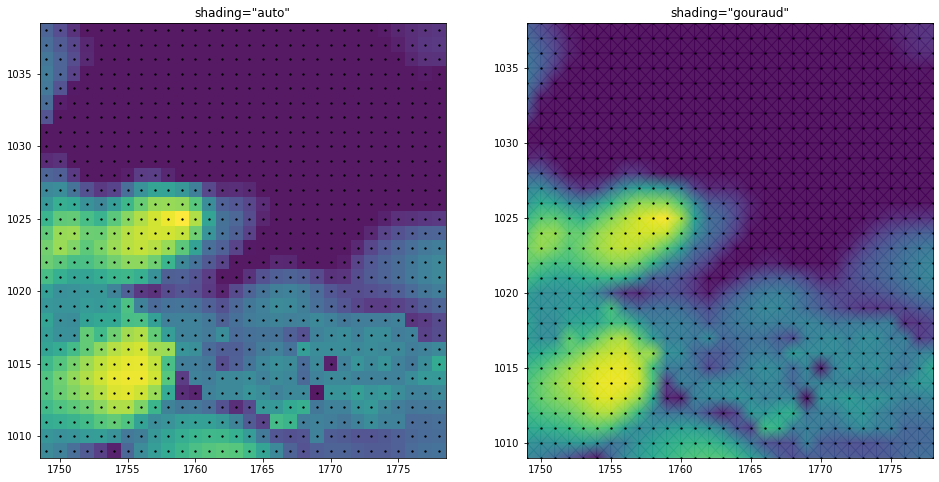

In [12]:
import numpy as np
a = slice(-50,-20)

fig, axes = plt.subplots(1,2, figsize=[16,8])

axes[0].pcolormesh(*np.meshgrid(H.x[a], H.y[a]), H.refc[a,a], alpha=.9)
axes[0].scatter(*np.meshgrid(H.x[a], H.y[a]), marker='.', s=7, color='k')
axes[0].set_title('shading="auto"')

axes[1].pcolormesh(*np.meshgrid(H.x[a], H.y[a]), H.refc[a,a], alpha=.9, shading='gouraud')
axes[1].scatter(*np.meshgrid(H.x[a], H.y[a]), marker='.', s=7, color='k')
axes[1].set_title('shading="gouraud"')